In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df=pd.read_csv("Housing.csv")

In [141]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [202]:
# df.isnull().sum()

In [200]:
# df.describe()

In [204]:
en_data=df[["mainroad","guestroom","basement","prefarea","hotwaterheating","airconditioning"]]

In [206]:
en_data

,mainroad,guestroom,basement,prefarea,hotwaterheating,airconditioning
0,yes,no,no,yes,no,yes
1,yes,no,no,no,no,yes
2,yes,no,yes,yes,no,no
3,yes,no,yes,yes,no,yes
4,yes,yes,yes,no,no,yes
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [208]:
 new_data=pd.get_dummies(en_data)
new_data.head(1)

,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,prefarea_no,prefarea_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes
0,False,True,True,False,True,False,False,True,True,False,False,True


In [210]:
new_data.drop(columns=['mainroad_no', 'guestroom_no', 'basement_no', 'prefarea_no','hotwaterheating_no','airconditioning_no'], inplace=True)
new_data

,mainroad_yes,guestroom_yes,basement_yes,prefarea_yes,hotwaterheating_yes,airconditioning_yes
0,True,False,False,True,False,True
1,True,False,False,False,False,True
2,True,False,True,True,False,False
3,True,False,True,True,False,True
4,True,True,True,False,False,True
...,...,...,...,...,...,...
540,True,False,True,False,False,False
541,False,False,False,False,False,False
542,True,False,False,False,False,False
543,False,False,False,False,False,False


In [232]:
new_data

,mainroad_yes,guestroom_yes,basement_yes,prefarea_yes,hotwaterheating_yes,airconditioning_yes
0,1,0,0,1,0,1
1,1,0,0,0,0,1
2,1,0,1,1,0,0
3,1,0,1,1,0,1
4,1,1,1,0,0,1
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [216]:
# cleaning last column
df['furnishingstatus'].unique()

array([2, 1, 0], dtype=int64)

In [191]:
data={'furnished':2, 'semi-furnished':1, 'unfurnished':0}


In [195]:
df["furnishingstatus"]=df["furnishingstatus"].map(data);
new

0      2
1      2
2      1
3      2
4      2
      ..
540    0
541    1
542    0
543    2
544    0
Name: furnishingstatus, Length: 545, dtype: int64

In [236]:
# df.drop(columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'],inplace=True)
df[['mainroad','guestroom','basement','prefarea','hotwaterheating','airconditioning']]=new_data

In [238]:
df

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,prefarea,hotwaterheating,airconditioning
0,13300000,7420,4,2,3,2,2,1,0,0,1,0,1
1,12250000,8960,4,4,4,3,2,1,0,0,0,0,1
2,12250000,9960,3,2,2,2,1,1,0,1,1,0,0
3,12215000,7500,4,2,2,3,2,1,0,1,1,0,1
4,11410000,7420,4,1,2,2,2,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,0,1,0,0,0
541,1767150,2400,3,1,1,0,1,0,0,0,0,0,0
542,1750000,3620,2,1,1,0,0,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,2,0,0,0,0,0,0


In [240]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,prefarea,hotwaterheating,airconditioning
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.304721,0.296898,0.255517,0.187057,0.329777,0.093073,0.452954
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.171445,0.288874,0.140297,0.047417,0.234779,-0.009229,0.222393
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.123244,-0.012033,0.080549,0.097312,0.079023,0.046049,0.160603
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.143559,0.042398,0.126469,0.102106,0.063472,0.067159,0.186915
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.104672,0.121706,0.043538,-0.172394,0.044425,0.018847,0.293602
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.177539,0.204433,0.037466,0.051497,0.091627,0.067864,0.159173
furnishingstatus,0.304721,0.171445,0.123244,0.143559,0.104672,0.177539,1.000000,0.156726,0.118328,0.112831,0.107686,0.031628,0.150477
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433,0.156726,1.000000,0.092337,0.044002,0.199876,-0.011781,0.105423
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466,0.118328,0.092337,1.000000,0.372066,0.160897,-0.010308,0.138179
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497,0.112831,0.044002,0.372066,1.000000,0.228083,0.004385,0.047341


<Axes: >

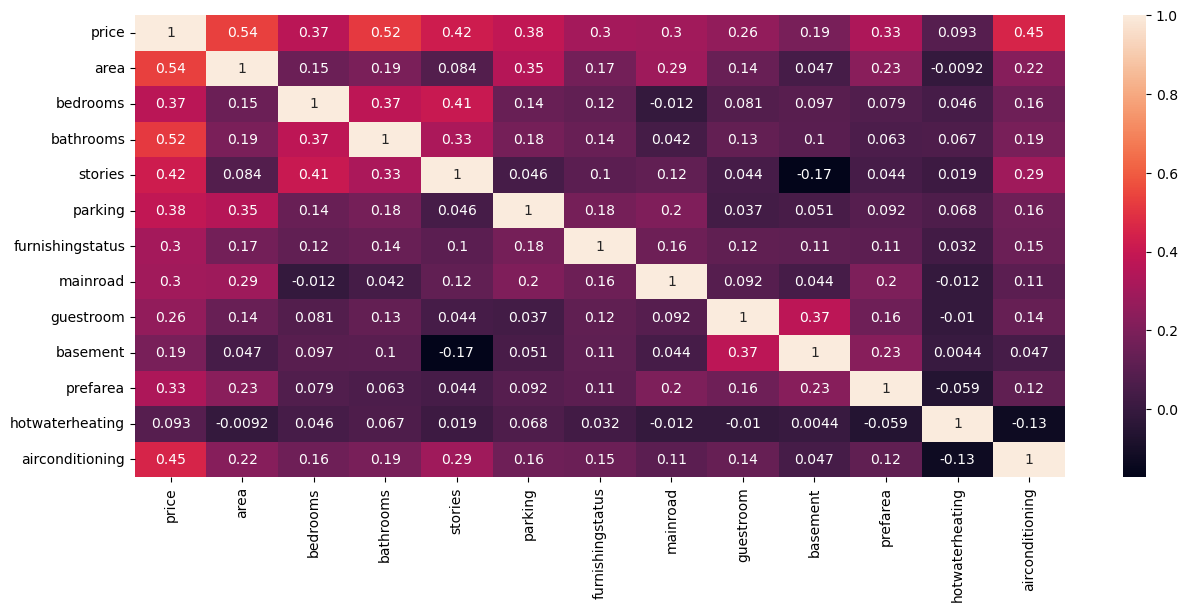

In [246]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.corr(),annot=True)

In [252]:
x=df.iloc[:,1:]
x

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,prefarea,hotwaterheating,airconditioning
0,7420,4,2,3,2,2,1,0,0,1,0,1
1,8960,4,4,4,3,2,1,0,0,0,0,1
2,9960,3,2,2,2,1,1,0,1,1,0,0
3,7500,4,2,2,3,2,1,0,1,1,0,1
4,7420,4,1,2,2,2,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,0,1,0,1,0,0,0
541,2400,3,1,1,0,1,0,0,0,0,0,0
542,3620,2,1,1,0,0,1,0,0,0,0,0
543,2910,3,1,1,0,2,0,0,0,0,0,0


In [256]:
y=df.iloc[:,1]
y

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [260]:
from sklearn.preprocessing import StandardScaler

In [262]:
ss=StandardScaler()

In [316]:
new_df=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
new_df

,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad,guestroom,basement,prefarea,hotwaterheating,airconditioning
0,1.046726,1.403419,1.421812,1.378217,1.517692,1.406286,0.405623,-0.465315,-0.734539,1.804941,-0.219265,1.472618
1,1.757010,1.403419,5.405809,2.532024,2.679409,1.406286,0.405623,-0.465315,-0.734539,-0.554035,-0.219265,1.472618
2,2.218232,0.047278,1.421812,0.224410,1.517692,0.091662,0.405623,-0.465315,1.361397,1.804941,-0.219265,-0.679063
3,1.083624,1.403419,1.421812,0.224410,2.679409,1.406286,0.405623,-0.465315,1.361397,1.804941,-0.219265,1.472618
4,1.046726,1.403419,-0.570187,0.224410,1.517692,1.406286,0.405623,2.149083,1.361397,-0.554035,-0.219265,1.472618
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692,-1.222962,0.405623,-0.465315,1.361397,-0.554035,-0.219265,-0.679063
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741,0.091662,-2.465344,-0.465315,-0.734539,-0.554035,-0.219265,-0.679063
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741,-1.222962,0.405623,-0.465315,-0.734539,-0.554035,-0.219265,-0.679063
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741,1.406286,-2.465344,-0.465315,-0.734539,-0.554035,-0.219265,-0.679063


In [320]:
from sklearn.model_selection import train_test_split
y=new_df.iloc[:,1]
x=new_df.iloc[:,1:]


In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [324]:
from sklearn.linear_model import LinearRegression

In [326]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [328]:
lr.score(x_test,y_test)*100

100.0

<BarContainer object of 11 artists>

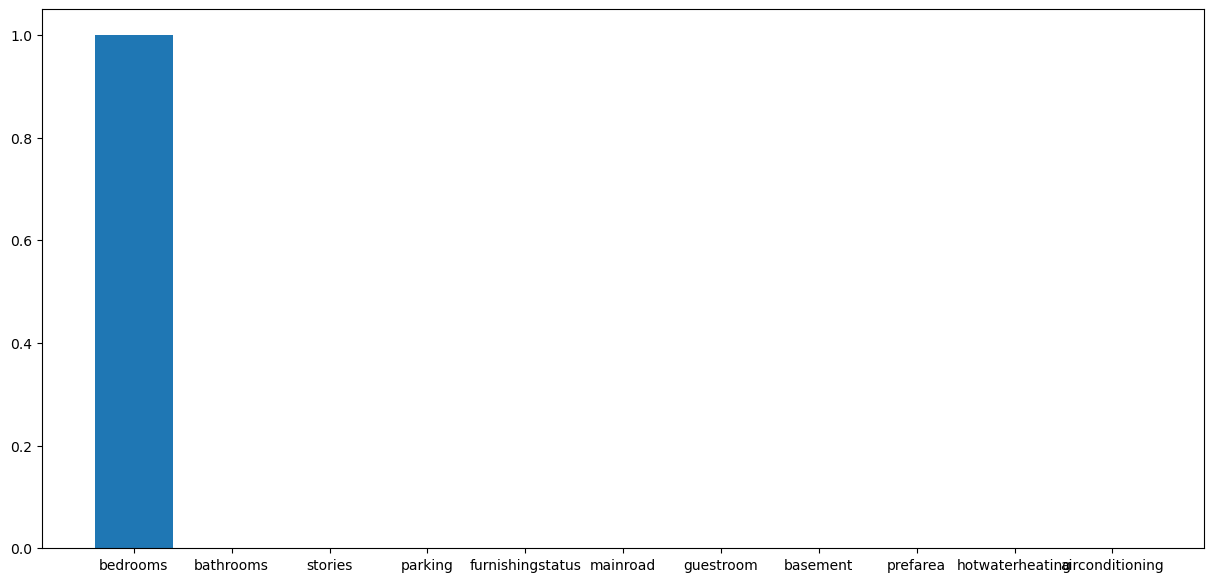

In [330]:
plt.figure(figsize=(15,7))
plt.bar(x.columns,lr.coef_)

In [332]:
from sklearn.linear_model import Lasso,Ridge
la=Lasso(alpha=0.5)


In [336]:
la.fit(x_train,y_train)

Lasso(alpha=0.5)

In [344]:
la.score(x_test,y_test)

0.762051279930876

<BarContainer object of 11 artists>

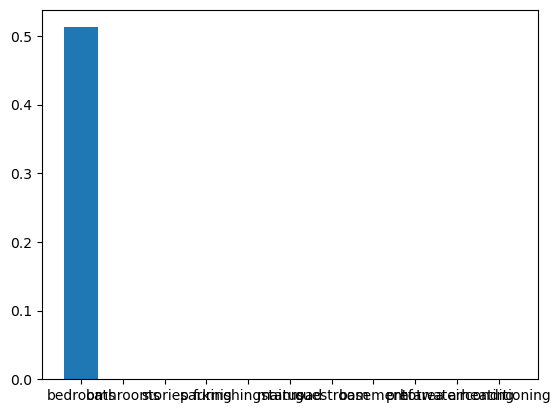

In [340]:
plt.bar(x.columns,la.coef_)